<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/6.Hands_On_6_classifica%C3%A7%C3%A3o_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos Descritivos**


**Professor**: Matheus Soares de Lacerda

Sala: 01

**Alunos:**

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

O objetivo do presente trabalho é Classificação de Países em Necessidade de Ajuda Humanitária.

**Base:** https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/country_data.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/country_data.csv')

# **1.Análise exploratória**

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
colunas = df.columns
colunas

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
# Verificação se há índices duplicados
duplicados = df.index.duplicated().any()

if duplicados:
    print("O DataFrame contém índices duplicados.")
else:
    print("O DataFrame não contém índices duplicados.")

O DataFrame não contém índices duplicados.


In [ ]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [ ]:
df['child_mort'].unique()

array([ 90.2,  16.6,  27.3, 119. ,  10.3,  14.5,  18.1,   4.8,   4.3,
        39.2,  13.8,   8.6,  49.4,  14.2,   5.5,   4.5,  18.8, 111. ,
        42.7,  46.6,   6.9,  52.5,  19.8,  10.5,  10.8, 116. ,  93.6,
        44.4, 108. ,   5.6,  26.5, 149. , 150. ,   8.7,  15.7,  18.6,
        88.2,  63.9,  10.2,   3.6,   3.4,   4.1,  34.4,  25.1,  29.1,
        19.2,  55.2,  24.1,   3. ,   4.2,  63.7,  80.3,  16.5,  74.7,
         3.9,  14.6,  35.4, 109. , 114. ,  37.6, 208. ,   6. ,   2.6,
        58.8,  33.3,  19.3,  36.9,   4.6,   4. ,   3.2,  21.1,  21.5,
        62.2,  62.7,  29.6,  78.9,   7.8,  99.7,  89.3,   6.1,   2.8,
        10.4,  90.5,   7.9,  13.2, 137. ,   6.8,  97.4,  15. ,  40. ,
        17.2,  26.1,  33.5, 101. ,  64.4,  56. ,  47. ,   6.2, 123. ,
       130. ,  11.7,  92.1,  19.7,  20.3,  31.9,   9. ,  11.5,  10. ,
        63.6,  18.9,  66.8,   7.6,  14.4, 160. ,   7. ,  28.1,  53.7,
         3.8,  11.2,  20.7,  76.7,  52.4,  71.9,  14.9,  62.6,  90.3,
        17.4,  19.1,

In [ ]:
df['exports'].unique()

array([1.00e+01, 2.80e+01, 3.84e+01, 6.23e+01, 4.55e+01, 1.89e+01,
       2.08e+01, 1.98e+01, 5.13e+01, 5.43e+01, 3.50e+01, 6.95e+01,
       1.60e+01, 3.95e+01, 5.14e+01, 7.64e+01, 5.82e+01, 2.38e+01,
       4.25e+01, 4.12e+01, 2.97e+01, 4.36e+01, 1.07e+01, 6.74e+01,
       5.02e+01, 1.92e+01, 8.92e+00, 5.41e+01, 2.22e+01, 2.91e+01,
       3.27e+01, 1.18e+01, 3.68e+01, 3.77e+01, 2.63e+01, 1.59e+01,
       1.65e+01, 4.11e+01, 8.51e+01, 3.32e+01, 5.06e+01, 3.76e+01,
       6.60e+01, 5.05e+01, 2.27e+01, 2.79e+01, 2.13e+01, 2.69e+01,
       8.58e+01, 4.79e+00, 7.51e+01, 5.78e+01, 3.87e+01, 2.68e+01,
       5.77e+01, 4.23e+01, 2.95e+01, 2.21e+01, 2.58e+01, 3.03e+01,
       1.49e+01, 1.53e+01, 8.18e+01, 5.34e+01, 2.26e+01, 2.43e+01,
       2.44e+01, 3.94e+01, 1.03e+02, 2.52e+01, 3.13e+01, 1.50e+01,
       4.83e+01, 4.42e+01, 2.07e+01, 1.33e+01, 6.67e+01, 5.16e+01,
       3.54e+01, 5.37e+01, 3.58e+01, 1.91e+01, 6.56e+01, 6.53e+01,
       1.75e+02, 3.98e+01, 2.50e+01, 2.28e+01, 8.69e+01, 7.76e

In [ ]:
df['health'].unique()

array([ 7.58,  6.55,  4.17,  2.85,  6.03,  8.1 ,  4.4 ,  8.73, 11.  ,
        5.88,  7.89,  4.97,  3.52,  7.97,  5.61, 10.7 ,  5.2 ,  4.1 ,
        4.84, 11.1 ,  8.3 ,  9.01,  2.84,  6.87,  6.74, 11.6 ,  5.68,
        5.13, 11.3 ,  4.09,  3.98,  4.53,  7.96,  5.07,  7.59,  4.51,
        7.91,  2.46, 10.9 ,  5.3 ,  7.76,  5.97,  7.88, 11.4 ,  6.22,
        8.06,  4.66,  6.91,  4.48,  2.66,  4.86,  8.95, 11.9 ,  3.5 ,
        5.69, 10.1 ,  5.22, 10.3 ,  5.86,  6.85,  4.93,  8.5 ,  5.38,
        7.33,  9.4 ,  4.05,  2.61,  5.6 ,  8.41,  9.19,  7.63,  9.53,
        4.81,  9.49,  8.04,  4.29,  4.75,  2.63,  6.18,  4.47,  6.68,
        7.03, 11.8 ,  3.88,  7.04,  7.77,  7.09,  3.77,  6.59,  4.39,
        6.33,  4.98,  8.65,  4.41,  6.  , 14.2 , 11.7 ,  5.44,  9.11,
        5.21,  1.97,  6.78,  5.25,  5.16,  9.48,  2.77,  2.2 ,  5.87,
        5.08,  3.61,  7.46,  1.81,  5.58, 10.5 ,  6.47,  5.66, 10.4 ,
        3.4 , 13.1 ,  3.96,  8.79,  9.41,  8.55,  8.94,  6.93,  9.54,
        2.94,  6.32,

In [ ]:
df['imports'].unique()

array([4.49e+01, 4.86e+01, 3.14e+01, 4.29e+01, 5.89e+01, 1.60e+01,
       4.53e+01, 2.09e+01, 4.78e+01, 2.07e+01, 4.37e+01, 5.09e+01,
       2.18e+01, 4.87e+01, 6.45e+01, 7.47e+01, 5.75e+01, 3.72e+01,
       7.07e+01, 3.43e+01, 5.13e+01, 1.18e+01, 2.80e+01, 5.30e+01,
       2.96e+01, 3.92e+01, 5.95e+01, 2.70e+01, 3.10e+01, 6.18e+01,
       2.65e+01, 4.35e+01, 3.13e+01, 2.26e+01, 1.78e+01, 5.17e+01,
       4.96e+01, 5.47e+01, 3.50e+01, 4.33e+01, 3.81e+01, 6.29e+01,
       4.36e+01, 3.33e+01, 3.24e+01, 2.66e+01, 4.66e+01, 2.33e+01,
       6.87e+01, 6.39e+01, 3.74e+01, 2.81e+01, 1.89e+01, 4.27e+01,
       5.28e+01, 3.71e+01, 4.59e+01, 3.07e+01, 4.92e+01, 3.63e+01,
       4.32e+01, 3.52e+01, 7.91e+01, 6.47e+01, 7.65e+01, 2.71e+01,
       2.24e+01, 1.94e+01, 3.41e+01, 8.65e+01, 3.29e+01, 2.72e+01,
       1.36e+01, 6.90e+01, 2.99e+01, 3.36e+01, 7.99e+01, 3.04e+01,
       8.17e+01, 4.93e+01, 5.51e+01, 6.02e+01, 1.01e+02, 9.26e+01,
       4.21e+01, 6.72e+01, 1.42e+02, 5.81e+01, 4.30e+01, 3.49e

In [ ]:
df['income'].unique()

array([  1610,   9930,  12900,   5900,  19100,  18700,   6700,  41400,
        43200,  16000,  22900,  41100,   2440,  15300,  16200,   7880,
         1820,   6420,   5410,   9720,  13300,  14500,  80600,   1430,
          764,   2520,   2660,  40700,   5830,    888,   1930,  19400,
         9530,  10900,   1410,    609,   5190,  13000,   2690,  20100,
        33900,  28300,  44000,  11100,   9350,   9860,   7300,  33700,
         1420,  22700,   7350,  39800,  36900,  15400,   1660,   6730,
        40400,   3060,  28700,  11200,   6710,   1190,   1390,   5840,
         1500,  22300,  38800,   4410,   8430,  17400,  12700,  45700,
        29600,  36200,   8000,  35800,   9470,   2480,   1730,  75200,
         2790,   3980,  18300,  16300,   2380,    700,  21100,  91700,
        11400,   1030,  10500,   1870,   3320,  15900,   3340,   3910,
         7710,  14000,   6440,    918,   3720,   8460,   1990,  45500,
        32300,    814,   5150,  62300,  45300,   4280,   7290,   9960,
      

In [ ]:
df['inflation'].unique()

array([ 9.44e+00,  4.49e+00,  1.61e+01,  2.24e+01,  1.44e+00,  2.09e+01,
        7.77e+00,  1.16e+00,  8.73e-01,  1.38e+01, -3.93e-01,  7.44e+00,
        7.14e+00,  3.21e-01,  1.51e+01,  1.88e+00,  1.14e+00,  8.85e-01,
        5.99e+00,  8.78e+00,  1.40e+00,  8.92e+00,  8.41e+00,  1.67e+01,
        1.11e+00,  6.81e+00,  1.23e+01,  3.12e+00,  1.91e+00,  2.87e+00,
        5.05e-01,  2.01e+00,  6.39e+00,  8.96e+00,  6.94e+00,  3.86e+00,
        3.87e+00,  2.08e+01,  2.07e+01,  6.57e+00,  5.39e+00,  8.21e-01,
       -1.43e+00,  3.22e+00,  5.44e+00,  7.47e+00,  1.01e+01,  2.65e+00,
        2.49e+01,  1.16e+01,  1.74e+00,  4.23e+00,  3.51e-01,  1.05e+00,
        1.66e+01,  4.30e+00,  8.55e+00,  7.58e-01,  6.73e-01,  4.80e-01,
        5.14e+00,  2.97e+00,  5.73e+00,  5.45e+00,  2.33e+00,  5.47e+00,
        8.98e+00,  1.53e+01,  1.59e+01, -3.22e+00,  1.77e+00,  3.19e-01,
        9.81e+00, -1.90e+00,  8.43e+00,  1.95e+01,  2.09e+00,  1.52e+00,
        1.12e+01,  1.00e+01,  9.20e+00, -8.12e-01, 

In [ ]:
df['life_expec'].unique()

array([56.2, 76.3, 76.5, 60.1, 76.8, 75.8, 73.3, 82. , 80.5, 69.1, 73.8,
       76. , 70.4, 76.7, 80. , 71.4, 61.8, 72.1, 71.6, 57.1, 74.2, 77.1,
       73.9, 57.9, 57.7, 66.1, 57.3, 81.3, 72.5, 47.5, 56.5, 79.1, 74.6,
       76.4, 65.9, 57.5, 60.4, 80.4, 56.3, 79.9, 77.5, 79.5, 70.5, 74.1,
       60.9, 61.7, 65.3, 81.4, 62.9, 65.5, 72.8, 80.1, 62.2, 71.3, 58. ,
       55.6, 32.1, 74.5, 66.2, 69.9, 67.2, 81.7, 74.7, 82.8, 68.4, 62.8,
       60.7, 78.2, 68.5, 63.8, 73.1, 79.8, 46.5, 60.8, 76.1, 73.2, 74. ,
       53.1, 77.9, 59.5, 80.3, 68.2, 73.4, 65.4, 69.7, 73.5, 54.5, 66.8,
       58.6, 68.3, 80.7, 80.9, 58.8, 60.5, 81. , 77.8, 69. , 73.7, 69.2,
       64.6, 71.5, 75.1, 64. , 55. , 82.7, 75.5, 54.3, 81.9, 74.4, 66.3,
       70.3, 81.5, 82.2, 69.6, 59.3, 76.6, 71.1, 58.7, 76.9, 67.9, 56.8,
       78.7, 68.8, 63. , 75.4, 67.5, 52. ])

In [ ]:
df['total_fer'].unique()


array([5.82, 1.65, 2.89, 6.16, 2.13, 2.37, 1.69, 1.93, 1.44, 1.92, 1.86,
       2.16, 2.33, 1.78, 1.49, 2.71, 5.36, 2.38, 3.2 , 1.31, 2.88, 1.8 ,
       1.84, 1.57, 5.87, 6.26, 5.11, 1.63, 2.67, 5.21, 6.59, 1.88, 1.59,
       2.01, 4.75, 6.54, 4.95, 5.27, 1.55, 1.42, 1.51, 1.87, 2.6 , 2.66,
       3.19, 2.27, 4.61, 1.72, 2.03, 4.08, 5.71, 1.39, 4.27, 1.48, 2.24,
       3.38, 5.34, 5.05, 2.65, 3.33, 1.25, 2.2 , 2.48, 1.76, 4.56, 2.05,
       3.03, 1.46, 2.17, 3.66, 4.37, 3.84, 2.21, 3.1 , 3.15, 1.36, 1.61,
       3.3 , 5.02, 2.41, 1.5 , 1.47, 4.6 , 5.31, 2.15, 2.23, 6.55, 4.98,
       3.46, 1.27, 2.64, 1.77, 2.58, 5.56, 3.6 , 2.61, 1.79, 7.49, 5.84,
       1.95, 2.9 , 3.85, 2.62, 2.73, 2.54, 3.16, 1.41, 2.07, 4.51, 4.34,
       2.96, 5.06, 1.4 , 5.2 , 1.15, 1.43, 4.24, 2.59, 1.23, 1.37, 4.88,
       2.52, 1.98, 1.52, 3.51, 5.43, 6.23, 4.87, 3.91, 2.14, 2.83, 6.15,
       2.08, 2.34, 3.5 , 2.47, 4.67, 5.4 ])

In [ ]:
df['gdpp'].unique()

array([   553,   4090,   4460,   3530,  12200,  10300,   3220,  51900,
        46900,   5840,  28000,  20700,    758,  16000,   6030,  44400,
         4340,   2180,   1980,   4610,   6350,  11200,  35300,   6840,
          575,    231,    786,   1310,  47400,   3310,    446,    897,
        12900,   4560,   6250,    769,    334,   2740,   8200,   1220,
        13500,  30800,  19800,  58000,   5450,   4660,   2600,   2990,
        17100,    482,  14600,   3650,  46200,  40600,   8750,    562,
         2960,  41800,  26900,   7370,   2830,    648,    547,   3040,
          662,  13100,  41900,   1350,   3110,   6530,   4500,  48700,
        30600,  35800,   4680,  44500,   3680,   9070,    967,   1490,
        38500,    880,   1140,  11300,   8860,   1170,    327,  12100,
        12000, 105000,   4540,    413,    459,   7100,    708,  21100,
         1200,   8000,   2860,   1630,   2650,   6680,    419,    988,
         5190,    592,  50300,  33700,    348,   2330,  87800,  19300,
      

In [ ]:
  df[['child_mort', 'exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
#informação econômica por país (balança comercial)
# Calcular a balança comercial: exportações - importações
df['balanca_comercial'] = df['exports'] - df['imports']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,balanca_comercial
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4


In [ ]:
#cálculo da balança comercial negativa e a ordenação
valores_negativos = df[df['balanca_comercial'] < 0]
vinte_maiores_negativos = valores_negativos.nsmallest(20, 'balanca_comercial')
maiores_negativos_paises = vinte_maiores_negativos[['balanca_comercial', 'country']]

print("Vinte países com Maiores Balanças Comerciais Negativas:")
print(maiores_negativos_paises)

Vinte países com Maiores Balanças Comerciais Negativas:
     balanca_comercial                         country
88              -73.50                         Liberia
81              -66.60                        Kiribati
87              -61.60                         Lesotho
101             -57.50           Micronesia, Fed. Sts.
66              -49.40                           Haiti
151             -47.90                           Tonga
146             -43.70                      Tajikistan
102             -39.30                         Moldova
36              -35.20                         Comoros
0               -34.90                     Afghanistan
136             -31.90                 Solomon Islands
26              -30.28                         Burundi
141             -30.20  St. Vincent and the Grenadines
83              -30.10                 Kyrgyz Republic
30              -29.10                      Cape Verde
18              -28.20                          Bhutan
65       

<ipython-input-20-c3afcd9247b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balanca_comercial', y='country', data=vinte_maiores_negativos, palette='viridis')


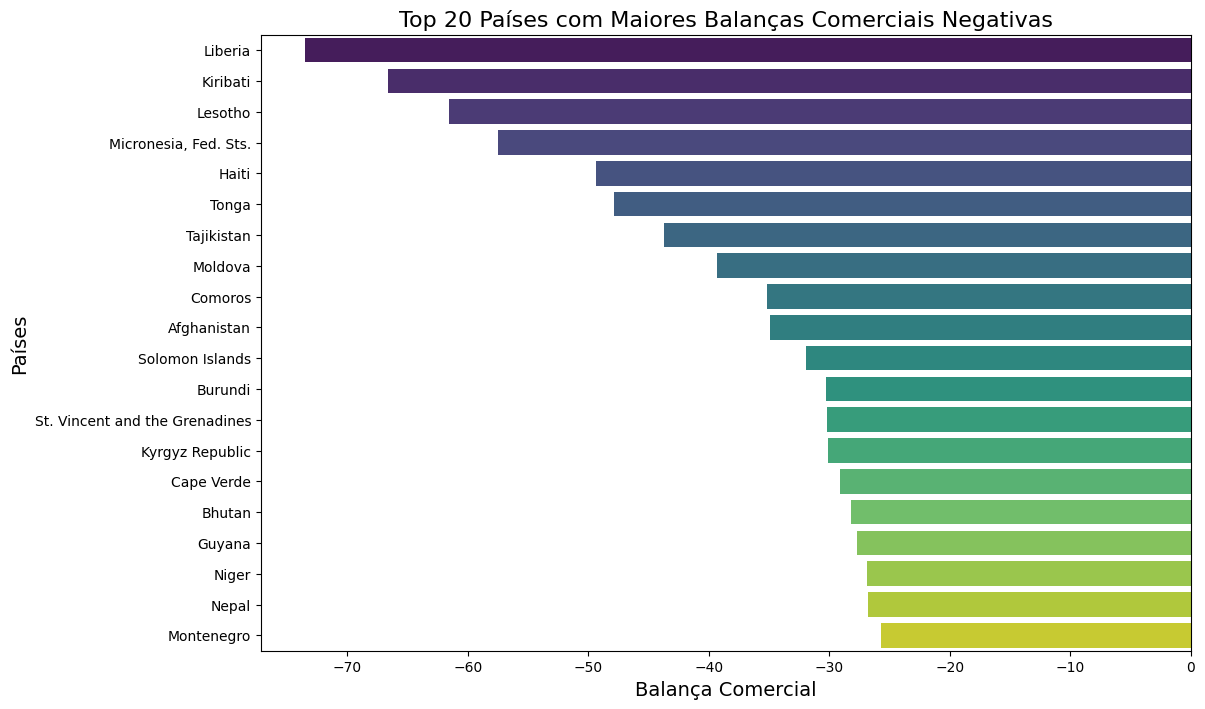

In [ ]:
#Gráfico dos 20 países com Maiores Balanças Comerciais Negativas:
plt.figure(figsize=(12, 8))
sns.barplot(x='balanca_comercial', y='country', data=vinte_maiores_negativos, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com Maiores Balanças Comerciais Negativas', fontsize=16)
plt.xlabel('Balança Comercial', fontsize=14)
plt.ylabel('Países', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
#Calculo das 20 piores Inflações

# Obter os 20 maiores valores da coluna 'inflação' e os respectivos países
vinte_maiores_inflacao = df.nlargest(20, 'inflation')

# Selecionar as colunas 'inflation' e 'country'
maiores_inflacao_paises = vinte_maiores_inflacao[['inflation', 'country']]

# Exibir o resultado
print("Vinte Maiores Valores de Inflação e seus Países:")
print(maiores_inflacao_paises)

Vinte Maiores Valores de Inflação e seus Países:
     inflation            country
113      104.0            Nigeria
163       45.9          Venezuela
103       39.2           Mongolia
149       26.5        Timor-Leste
49        24.9  Equatorial Guinea
165       23.6              Yemen
140       22.8          Sri Lanka
3         22.4             Angola
5         20.9          Argentina
37        20.8   Congo, Dem. Rep.
38        20.7        Congo, Rep.
142       19.6              Sudan
79        19.5         Kazakhstan
99        18.9         Mauritania
128       17.2       Saudi Arabia
132       17.2       Sierra Leone
23        16.7             Brunei
55        16.6              Gabon
59        16.6              Ghana
72        16.6               Iraq


<ipython-input-22-46b9de4320c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='inflation', y='country', data=vinte_maiores_inflacao, palette='viridis')


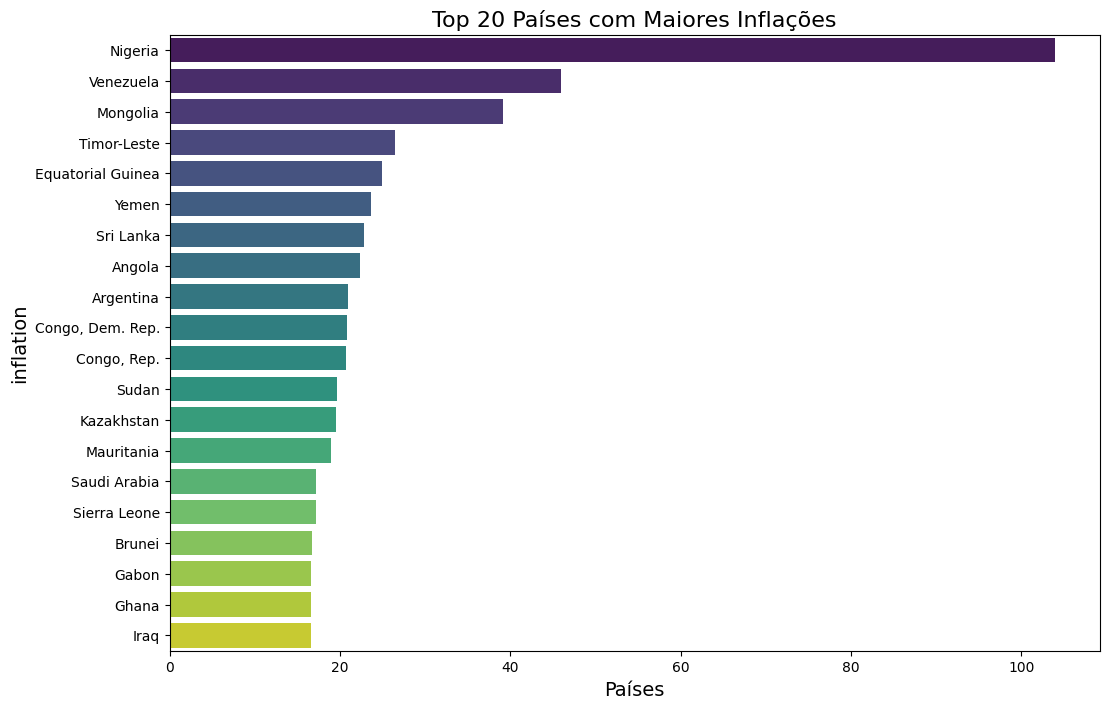

In [ ]:
#Gráfico dos 20 países com Maiores Inflações:
plt.figure(figsize=(12, 8))
sns.barplot(x='inflation', y='country', data=vinte_maiores_inflacao, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com Maiores Inflações', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('inflation', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 piores Países com maior Mortalidade Infantil

# Obter os 20 maiores valores da coluna 'Mortalidade Infantil' e os respectivos países
vinte_maiores_mortalidade = df.nlargest(20, 'child_mort')

# Selecionar as colunas 'child_mort' e 'country'
maiores_mortalidade = vinte_maiores_mortalidade[['child_mort', 'country']]

# Exibir o resultado
print("Vinte Países com Maior Mortalidade Infantil:")
print(maiores_mortalidade)

Vinte Países com Maior Mortalidade Infantil:
     child_mort                   country
66        208.0                     Haiti
132       160.0              Sierra Leone
32        150.0                      Chad
31        149.0  Central African Republic
97        137.0                      Mali
113       130.0                   Nigeria
112       123.0                     Niger
3         119.0                    Angola
25        116.0              Burkina Faso
37        116.0          Congo, Dem. Rep.
64        114.0             Guinea-Bissau
17        111.0                     Benin
40        111.0             Cote d'Ivoire
49        111.0         Equatorial Guinea
63        109.0                    Guinea
28        108.0                  Cameroon
106       101.0                Mozambique
87         99.7                   Lesotho
99         97.4                Mauritania
26         93.6                   Burundi


<ipython-input-24-62ec25805c81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='child_mort', data=maiores_mortalidade, palette='viridis')


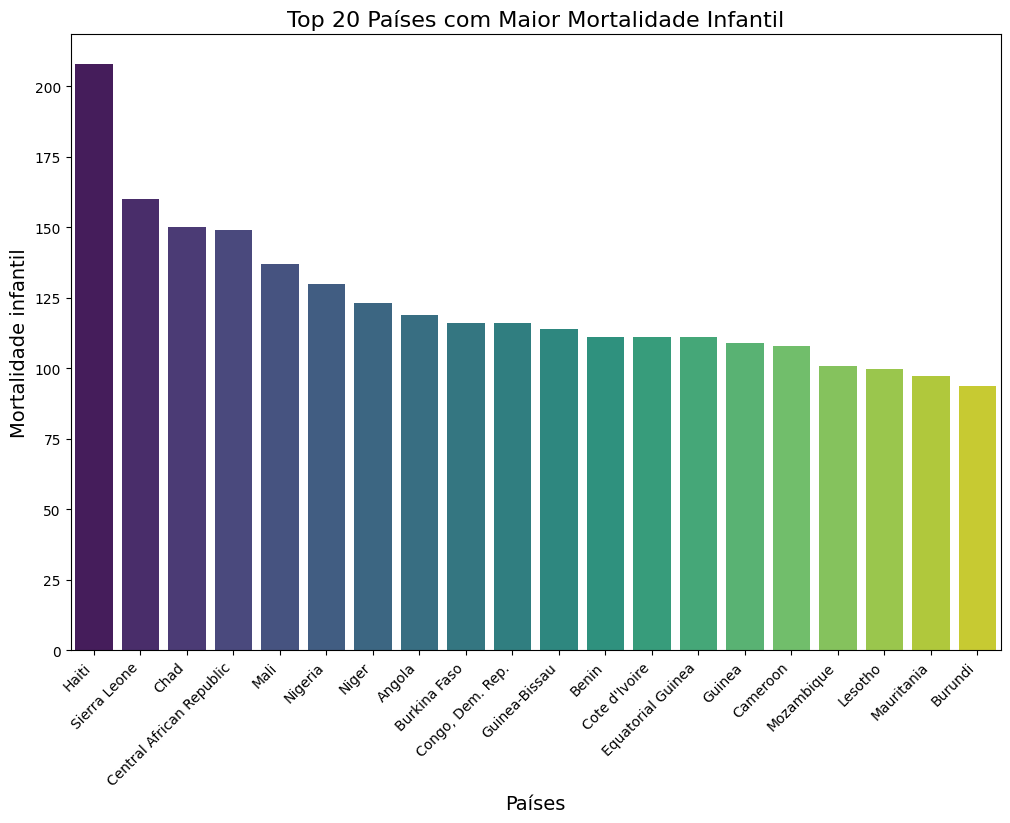

In [ ]:
#Gráfico dos 20 piores Países com Mortalidade Infantil:
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='child_mort', data=maiores_mortalidade, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com Maior Mortalidade Infantil', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mortalidade infantil', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 Países com pior saúde

# Obter os 20 menores valores da coluna 'saúde' e os respectivos países
vinte_menores_saúde = df.nsmallest(20, 'health')

# Selecionar as colunas 'health' e 'country'
menores_saúde = vinte_menores_saúde[['health', 'country']]

# Exibir o resultado
print("Vinte Países com pior saúde:")
print(menores_saúde)

Vinte Países com pior saúde:
     health               country
123    1.81                 Qatar
107    1.97               Myanmar
116    2.20              Pakistan
38     2.46           Congo, Rep.
154    2.50          Turkmenistan
70     2.61             Indonesia
82     2.63                Kuwait
50     2.66               Eritrea
115    2.77                  Oman
23     2.84                Brunei
3      2.85                Angola
140    2.94             Sri Lanka
131    3.40            Seychelles
55     3.50                 Gabon
12     3.52            Bangladesh
120    3.61           Philippines
157    3.66  United Arab Emirates
93     3.77            Madagascar
89     3.88                 Libya
148    3.88              Thailand


<ipython-input-26-d6f9e9715082>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='health', data=menores_saúde, palette='viridis')


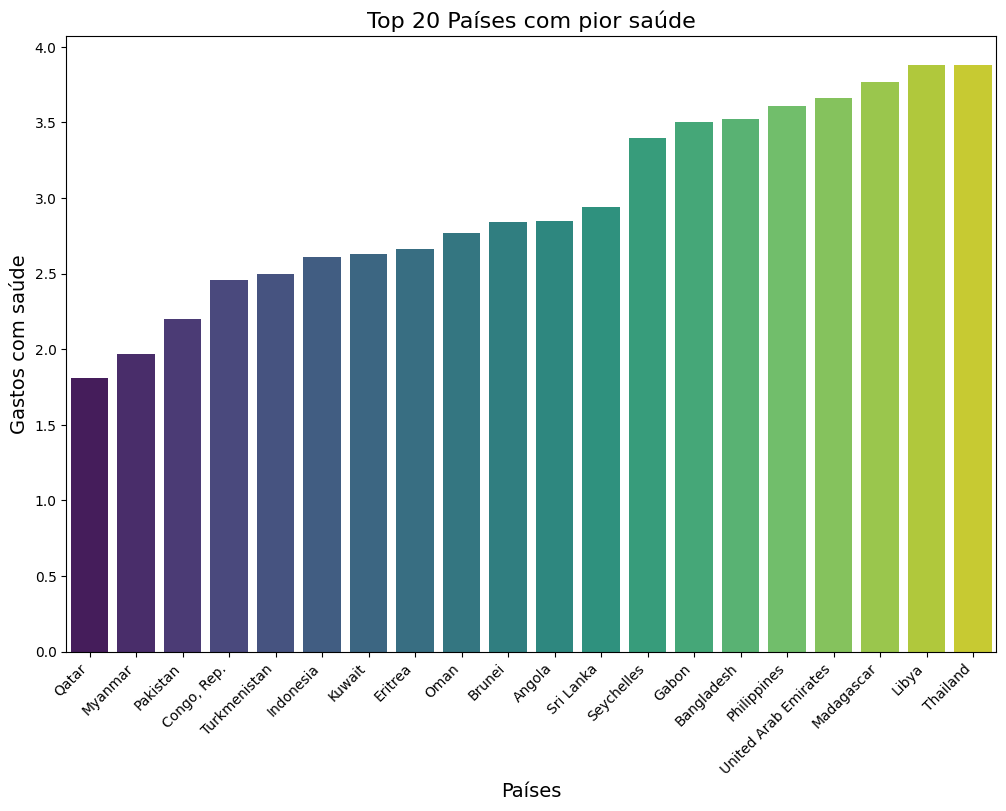

In [ ]:
#Gráfico dos 20 Países com pior Saúde
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='health', data=menores_saúde, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com pior saúde', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gastos com saúde', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# Obter os 20 maiores valores da coluna 'Mortalidade Infantil' e os respectivos países
vinte_maiores_mortalidade = df.nlargest(20, 'child_mort')

# Selecionar as colunas 'child_mort' e 'country'
maiores_mortalidade = vinte_maiores_mortalidade[['child_mort', 'country']]

# Exibir o resultado
print("Vinte Países com Maior Mortalidade Infantil:")
print(maiores_mortalidade)

Vinte Países com Maior Mortalidade Infantil:
     child_mort                   country
66        208.0                     Haiti
132       160.0              Sierra Leone
32        150.0                      Chad
31        149.0  Central African Republic
97        137.0                      Mali
113       130.0                   Nigeria
112       123.0                     Niger
3         119.0                    Angola
25        116.0              Burkina Faso
37        116.0          Congo, Dem. Rep.
64        114.0             Guinea-Bissau
17        111.0                     Benin
40        111.0             Cote d'Ivoire
49        111.0         Equatorial Guinea
63        109.0                    Guinea
28        108.0                  Cameroon
106       101.0                Mozambique
87         99.7                   Lesotho
99         97.4                Mauritania
26         93.6                   Burundi


<ipython-input-28-8cd932413d55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country',y='child_mort', data = maiores_mortalidade, palette='viridis')


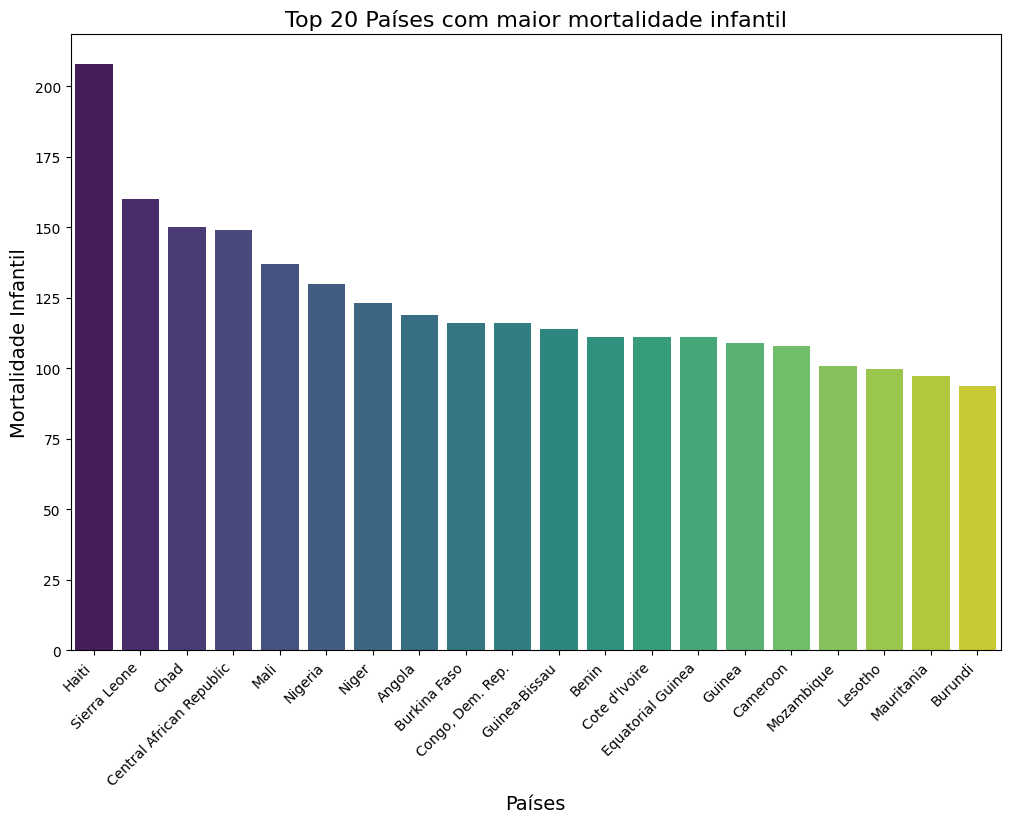

In [ ]:
#Gráfico dos 20 Países com maior Mortalidade Infantil
plt.figure(figsize=(12, 8))
sns.barplot(x='country',y='child_mort', data = maiores_mortalidade, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com maior mortalidade infantil', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mortalidade Infantil', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 Países com pior renda

# Obter os 20 menores valores da coluna 'renda' e os respectivos países
vinte_menores_renda = df.nsmallest(20, 'income')

# Selecionar as colunas 'income' e 'country'
menores_renda = vinte_menores_renda[['income', 'country']]

# Exibir o resultado
print("Vinte Países com pior renda:")
print(menores_renda)

Vinte Países com pior renda:
     income                   country
37      609          Congo, Dem. Rep.
88      700                   Liberia
26      764                   Burundi
112     814                     Niger
31      888  Central African Republic
106     918                Mozambique
94     1030                    Malawi
63     1190                    Guinea
150    1210                      Togo
132    1220              Sierra Leone
126    1350                    Rwanda
64     1390             Guinea-Bissau
93     1390                Madagascar
36     1410                   Comoros
50     1420                   Eritrea
25     1430              Burkina Faso
66     1500                     Haiti
155    1540                    Uganda
0      1610               Afghanistan
56     1660                    Gambia


<ipython-input-30-b8cb4023cb8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country',y='income', data = menores_renda, palette='viridis')


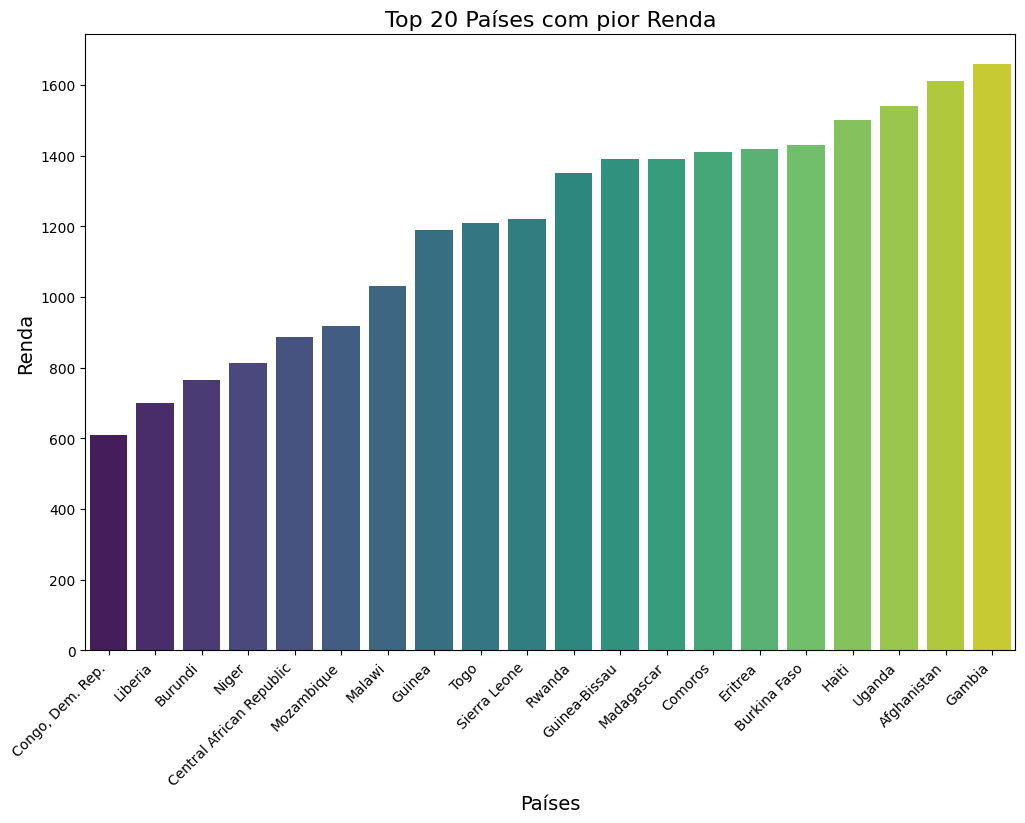

In [ ]:
#Gráfico dos 20 Países com pior Renda
plt.figure(figsize=(12, 8))
sns.barplot(x='country',y='income', data = menores_renda, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com pior Renda', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Renda', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 Países com piores Expectativas de Vida

# Obter os 20 piores valores da coluna 'Expectativa de vida' e os respectivos países
vinte_menores_vida = df.nsmallest(20, 'life_expec')

# Selecionar as colunas 'life_expec' e 'country'
menores_vida = vinte_menores_vida[['life_expec', 'country']]

# Exibir o resultado
print("Vinte Países com piores Expectativa de Vida:")
print(menores_vida)

Vinte Países com piores Expectativa de Vida:
     life_expec                   country
66         32.1                     Haiti
87         46.5                   Lesotho
31         47.5  Central African Republic
166        52.0                    Zambia
94         53.1                    Malawi
137        54.3              South Africa
106        54.5                Mozambique
132        55.0              Sierra Leone
64         55.6             Guinea-Bissau
0          56.2               Afghanistan
40         56.3             Cote d'Ivoire
32         56.5                      Chad
155        56.8                    Uganda
21         57.1                  Botswana
28         57.3                  Cameroon
37         57.5          Congo, Dem. Rep.
26         57.7                   Burundi
25         57.9              Burkina Faso
63         58.0                    Guinea
108        58.6                   Namibia


<ipython-input-32-917b4a3a0de8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='life_expec', x ='country', data = menores_vida, palette='viridis')


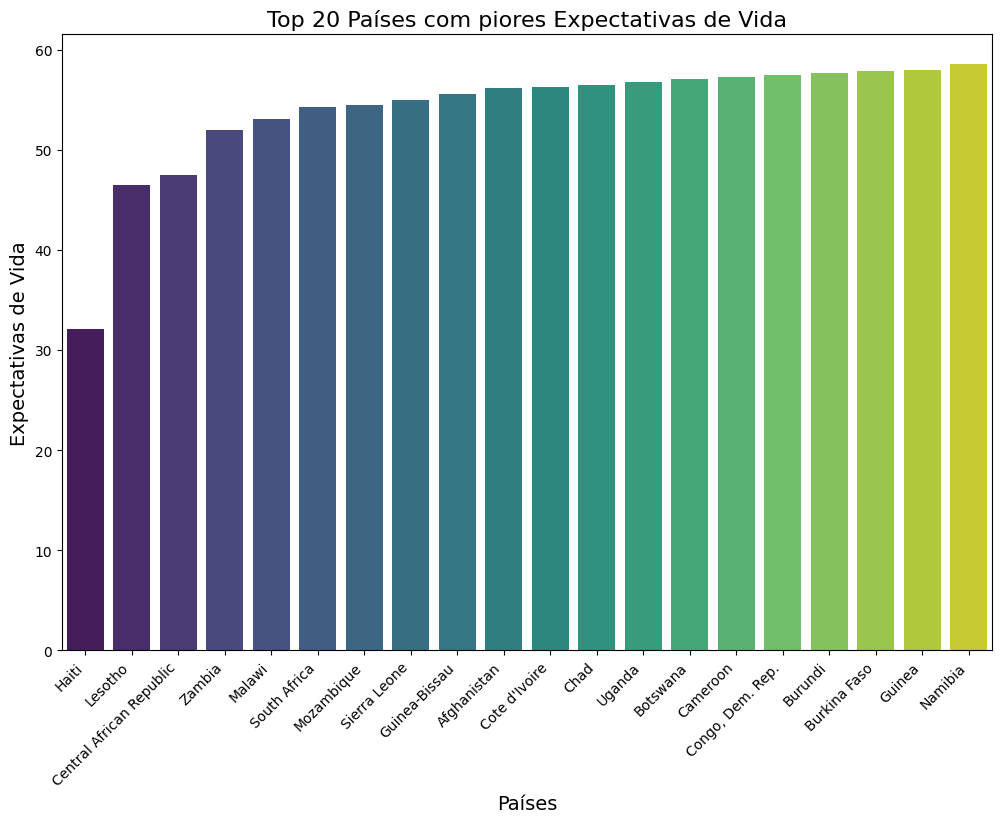

In [ ]:
#Gráfico dos 20 Países com piores Expectativas de Vida
plt.figure(figsize=(12, 8))
sns.barplot(y='life_expec', x ='country', data = menores_vida, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com piores Expectativas de Vida', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Expectativas de Vida', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 Países com  maior número médio de filhos

# Obter os 20 países com maiores valores na coluna 'Número Médio de Filhos'
vinte_maiores_filho = df.nlargest(20, 'total_fer')

# Selecionar as colunas 'total_fer' e 'country'
maiores_filho = vinte_maiores_filho[['total_fer', 'country']]

# Exibir o resultado
print("Vinte Países com Maior Número Médio de Filhos:")
print(maiores_filho)

Vinte Países com Maior Número Médio de Filhos:
     total_fer                   country
112       7.49                     Niger
32        6.59                      Chad
97        6.55                      Mali
37        6.54          Congo, Dem. Rep.
26        6.26                   Burundi
149       6.23               Timor-Leste
3         6.16                    Angola
155       6.15                    Uganda
25        5.87              Burkina Faso
113       5.84                   Nigeria
0         5.82               Afghanistan
56        5.71                    Gambia
106       5.56                Mozambique
147       5.43                  Tanzania
166       5.40                    Zambia
17        5.36                     Benin
63        5.34                    Guinea
94        5.31                    Malawi
40        5.27             Cote d'Ivoire
31        5.21  Central African Republic


<ipython-input-34-4d4a1b649ac1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y ='total_fer', data = maiores_filho, palette='viridis')


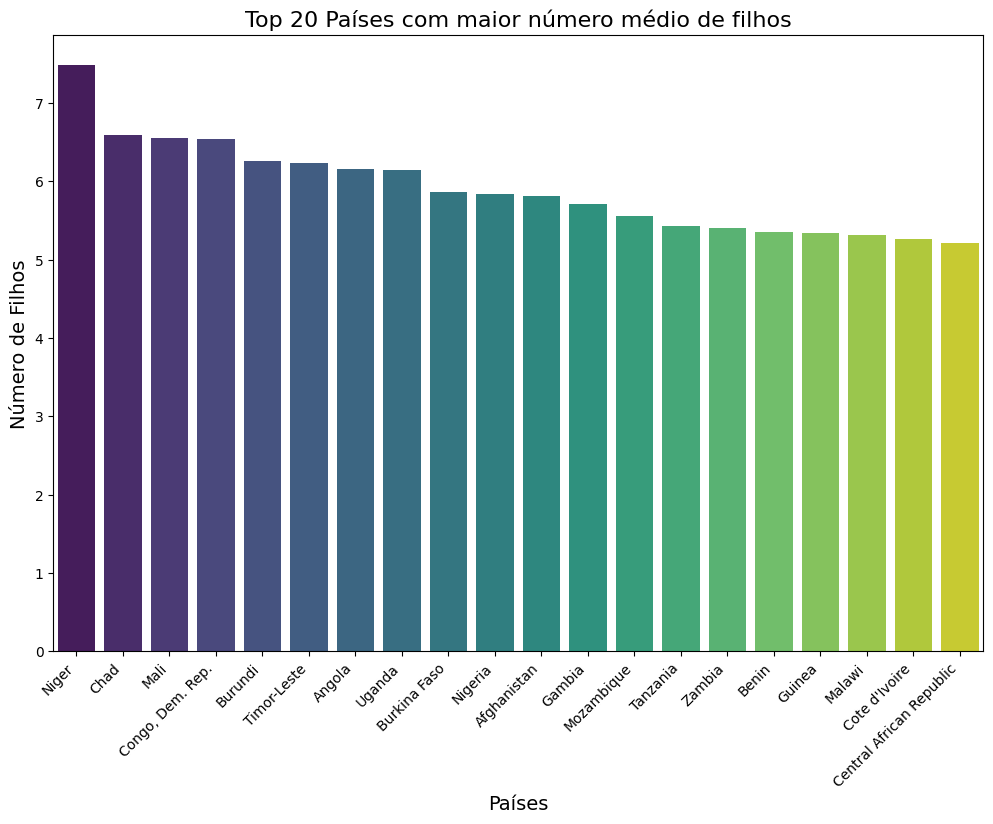

In [ ]:
#Gráfico dos 20 Países com  maior número médio de filhos
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y ='total_fer', data = maiores_filho, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com maior número médio de filhos', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Filhos', fontsize=14)

# Mostrar o gráfico
plt.show()

In [ ]:
# 20 Países com pior Produto Interno Bruto Per Capta

# Obter os 20 piores valores da coluna 'gdpp' e os respectivos países
vinte_menores_PIB = df.nsmallest(20, 'gdpp')

# Selecionar as colunas 'income' e 'country'
menores_PIB = vinte_menores_PIB[['gdpp', 'country']]

# Exibir o resultado
print("Vinte Países com pior PIB:")
print(menores_PIB)

Vinte Países com pior PIB:
     gdpp                   country
26    231                   Burundi
88    327                   Liberia
37    334          Congo, Dem. Rep.
112   348                     Niger
132   399              Sierra Leone
93    413                Madagascar
106   419                Mozambique
31    446  Central African Republic
94    459                    Malawi
50    482                   Eritrea
150   488                      Togo
64    547             Guinea-Bissau
0     553               Afghanistan
56    562                    Gambia
126   563                    Rwanda
25    575              Burkina Faso
109   592                     Nepal
155   595                    Uganda
63    648                    Guinea
66    662                     Haiti


<ipython-input-36-f829d4558e69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y ='gdpp', data = menores_PIB, palette='viridis')


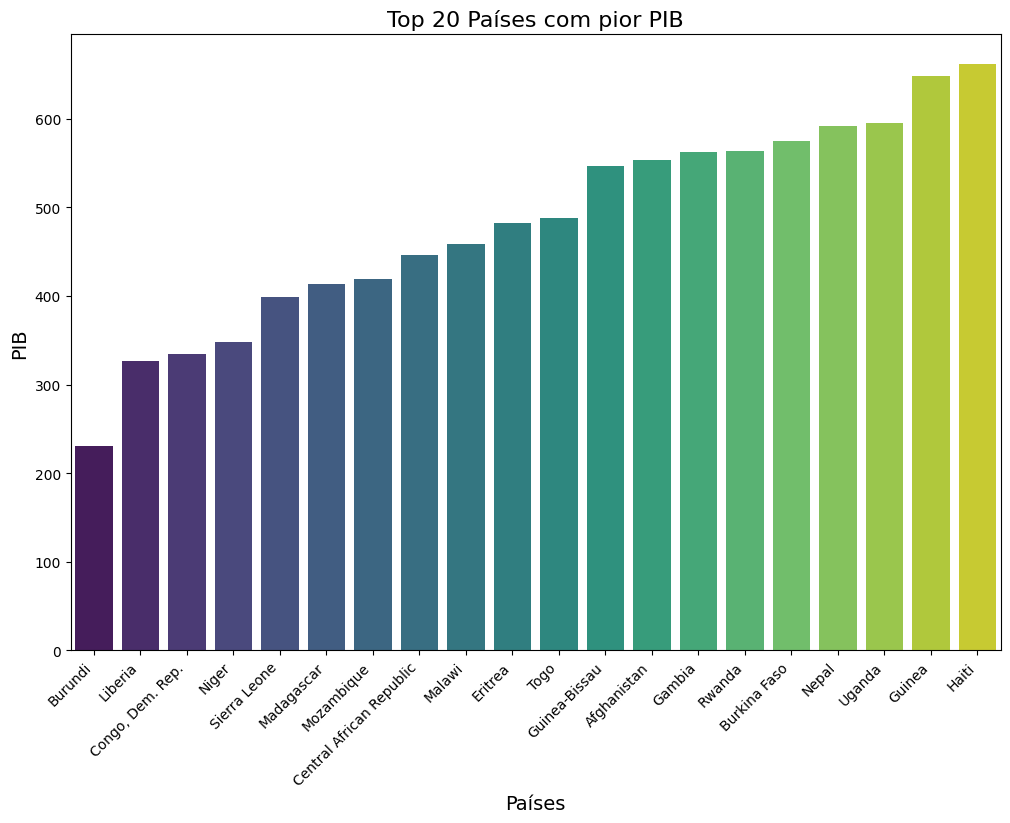

In [ ]:
#Gráfico dos 20 Países com  pior PIB
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y ='gdpp', data = menores_PIB, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 20 Países com pior PIB', fontsize=16)
plt.xlabel('Países', fontsize=14)
# Ajustar a rotação dos rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha='right')
plt.ylabel('PIB', fontsize=14)

# Mostrar o gráfico
plt.show()

# Análise Exploratória - Gráficos

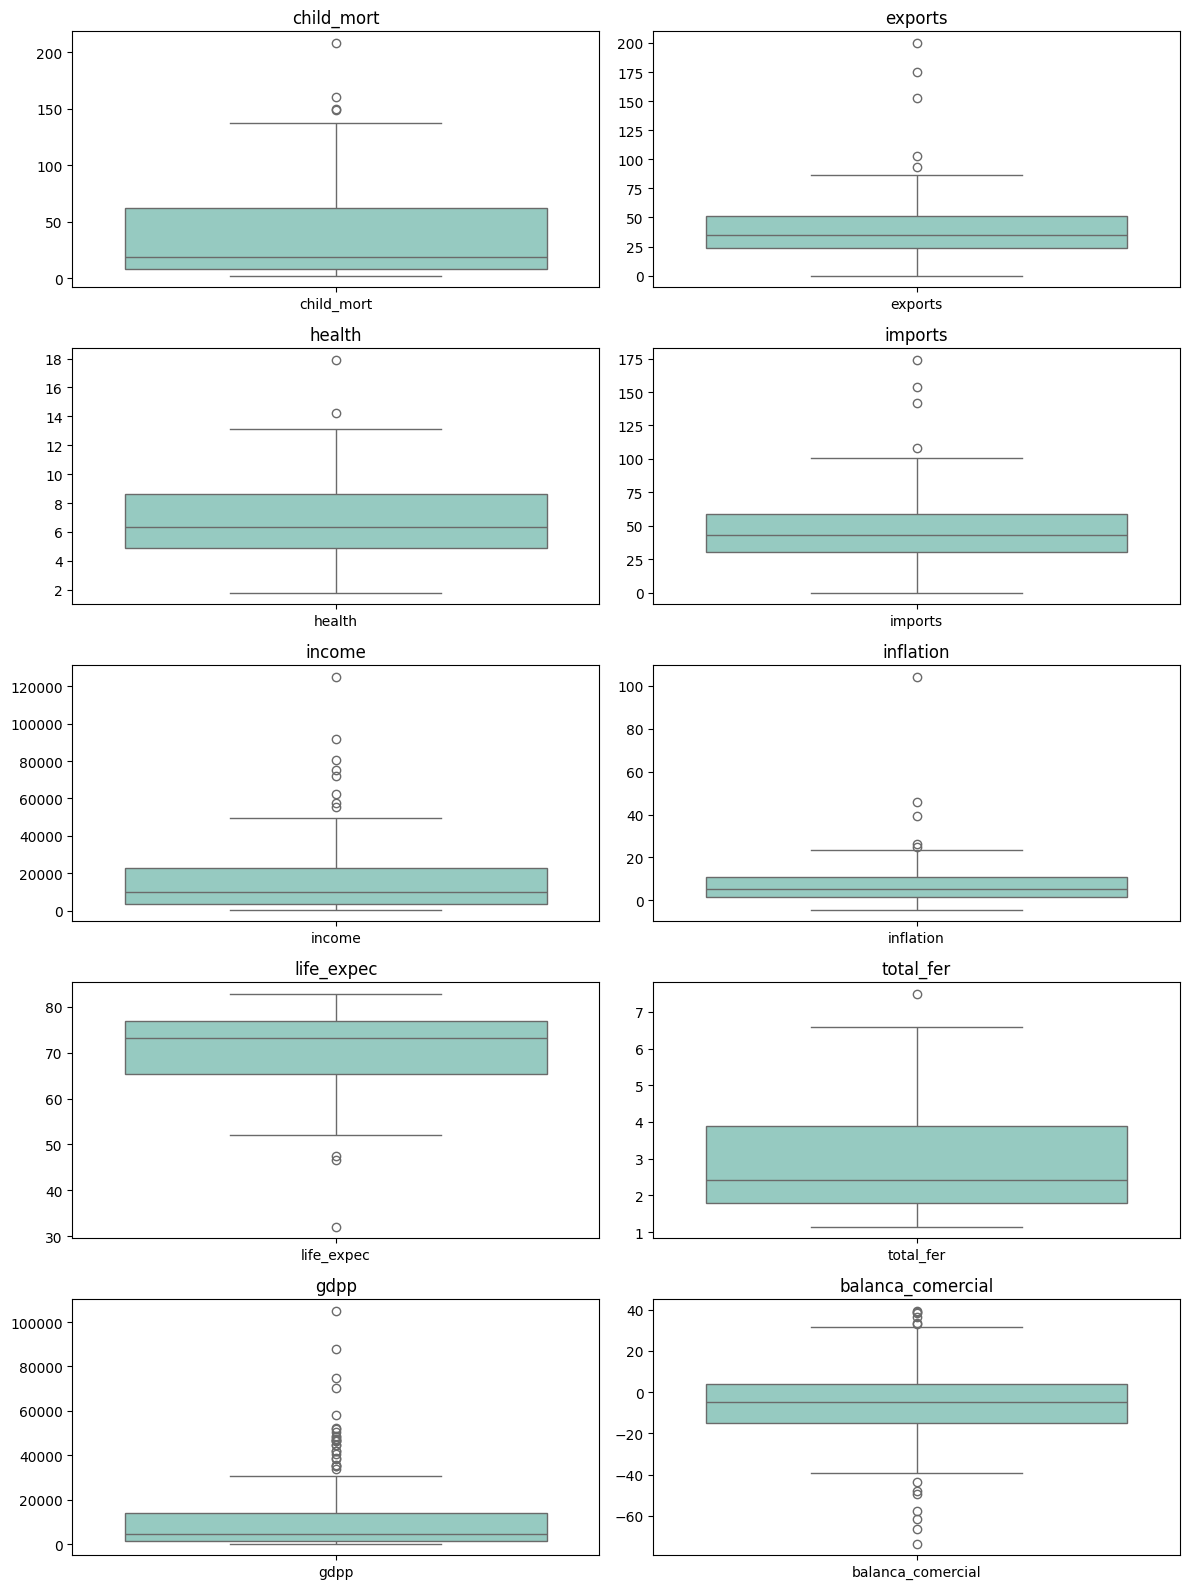

In [ ]:

# Configuração do tamanho da figura e dos subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))


# Lista das colunas para plotar
colunas = ['child_mort', 'exports', 'health', 'imports', 'income',
           'inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial']


# Loop para criar cada boxplot em sua posição
for i, col1 in enumerate(colunas):
    selected_colunas = df[[col1]]

    # Seleciona o eixo correto
    ax = axs[i // 2, i % 2]

    sns.boxplot(data=selected_colunas, ax=ax, palette="Set3")
    ax.grid(axis='y', linestyle='')
    ax.set_title(col1)

# Ajustar o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout(pad=3.0)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()



plt.show()

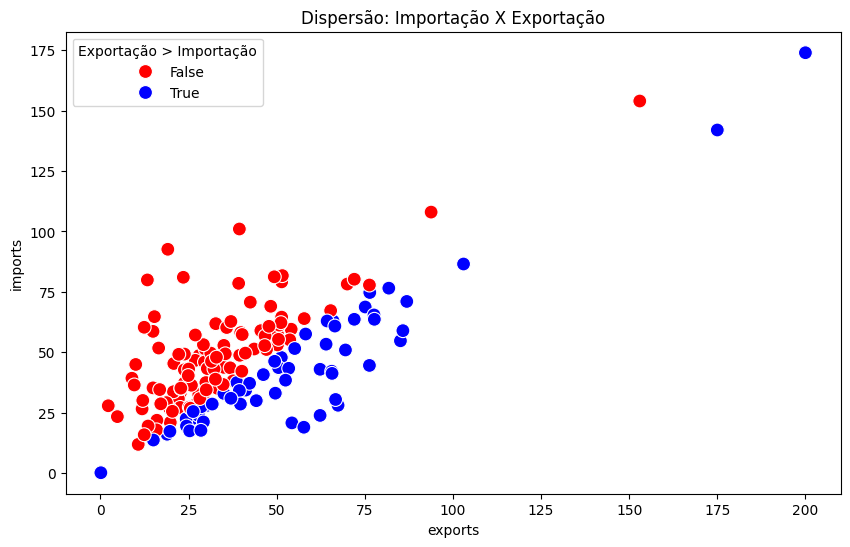

In [ ]:

# Criar scatter plot com coloração condicional
plt.figure(figsize=(10, 6))
sns.scatterplot(x='exports', y='imports', data=df, hue=df['exports'] > df['imports'], palette={True: 'blue', False: 'red'}, s=100)

# Adicionar título
plt.title('Dispersão: Importação X Exportação')

plt.legend(title='Exportação > Importação', loc='upper left')
plt.show()

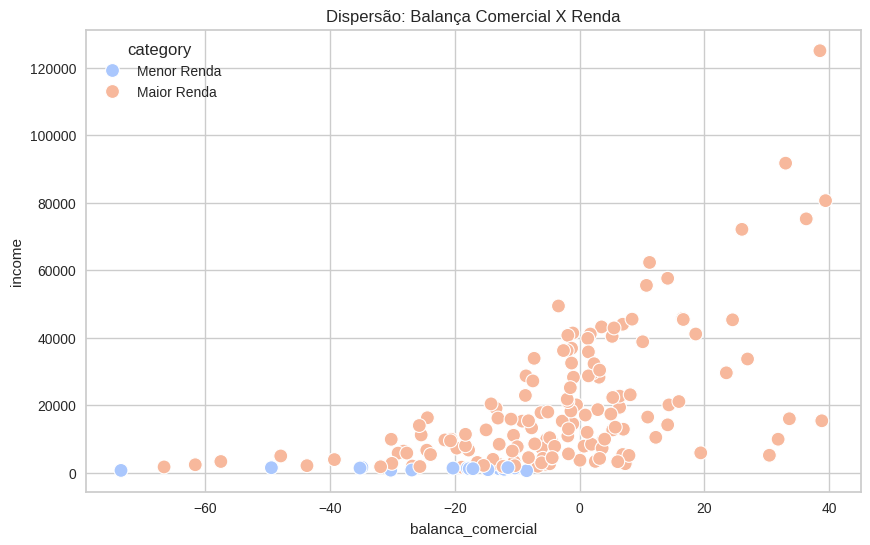

In [ ]:

# Criar coluna categorica para 'income'
df['category'] = np.where((df['income'] < 1611), 'Menor Renda', 'Maior Renda') # menor renda foi considerado o valor dos top 20 piores países

# Criar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balanca_comercial', y='income', hue='category', data=df, palette='coolwarm', s=100)

# Adicionar título
plt.title('Dispersão: Balança Comercial X Renda')




plt.show()

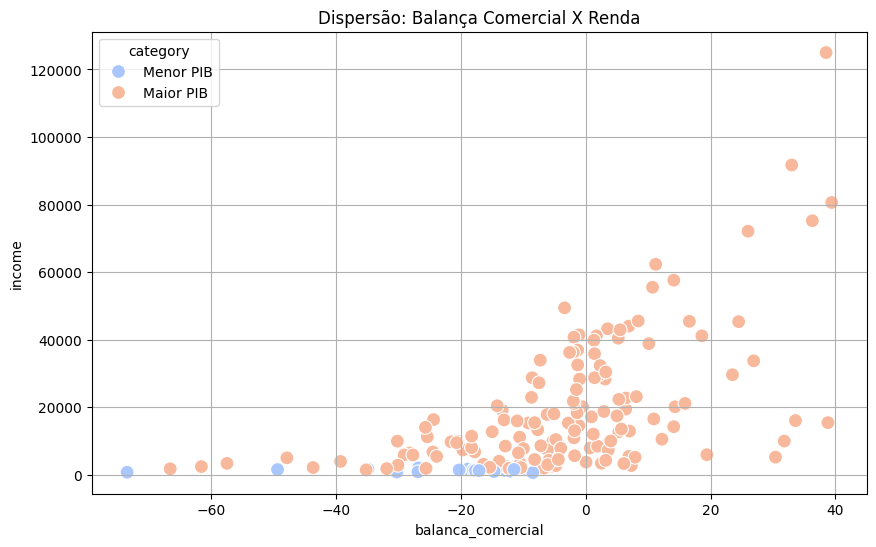

In [ ]:

# Criar coluna categorica para 'gdpp'
df['category'] = np.where((df['gdpp'] < 663), 'Menor PIB', 'Maior PIB') # menor pib foi considerado o valor dos top 20 piores países

# Criar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balanca_comercial', y='income', hue='category', data=df, palette='coolwarm', s=100)

# Adicionar título e grid
plt.title('Dispersão: Balança Comercial X Renda')
plt.grid(True)



plt.show()

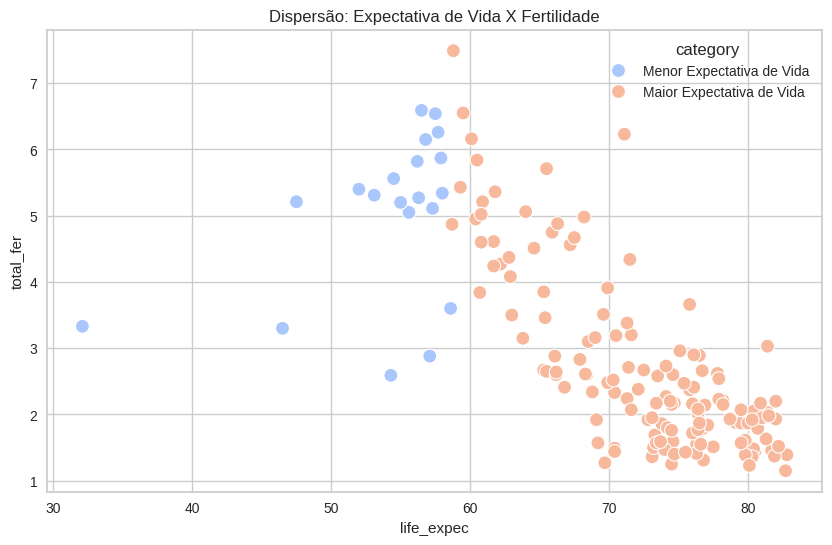

In [ ]:

# Criar coluna categorica para 'life_expect'
df['category'] = np.where((df['life_expec'] < 58.7), 'Menor Expectativa de Vida', 'Maior Expectativa de Vida')  # menor Expectativa de vida foi considerado o valor dos top 20 piores países

# Criar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='life_expec', y='total_fer', hue='category', data=df, palette='coolwarm', s=100)

# Adicionar título
plt.title('Dispersão: Expectativa de Vida X Fertilidade')
plt.show()

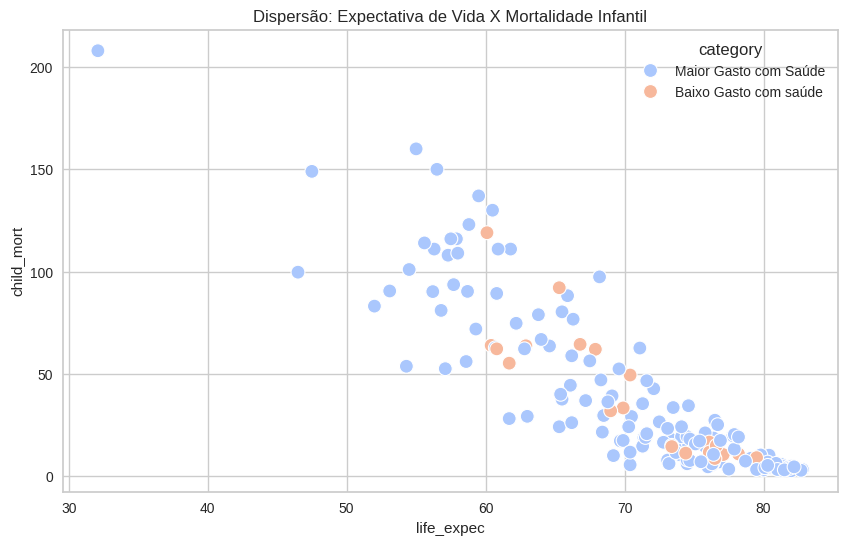

In [ ]:
# Criar coluna categorica para 'health'
df['category'] = np.where((df['health'] < 3.89), 'Baixo Gasto com saúde', 'Maior Gasto com Saúde') # Baixo gasto com saúde foi considerado o valor dos top 20 piores países

# Criar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='life_expec', y='child_mort', hue='category', data=df, palette='coolwarm', s=100)

# Adicionar título e grid
plt.title('Dispersão: Expectativa de Vida X Mortalidade Infantil')
plt.grid(True)
plt.show()

In [ ]:

# Definir condições para os piores casos
conditions = (
    (df['child_mort'] > 93.7) &
    (df['balanca_comercial'] < -25.70 ) &
    (df['health'] < 3.89) &
    (df['income'] < 1661) &
    (df['inflation'] > 16.7) &
    (df['life_expec'] < 58.7) &
    (df['total_fer'] > 5.20) &
    (df['gdpp'] > 663)
)

# Aplicar a condição
df_filtered = df[conditions]

# Top 10
df_top_10 = df_filtered.head(10)
df_top_10


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,balanca_comercial,category,Cluster


De ínicio, buscou saber os países que tivessem todas as condições tidas como piores no top 20 - respectiva categoria. Entretanto, quando colocado o elemento condicional & não foi devolvido nada. Portanto, não existe nenhum país presente em todos os top 20.

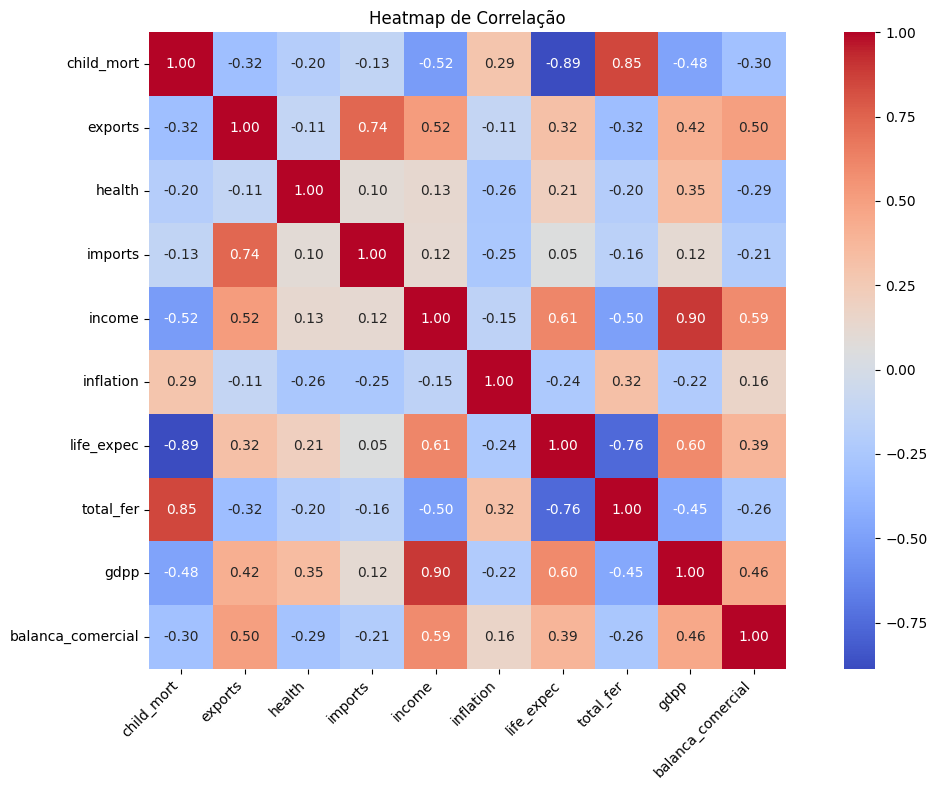

In [ ]:
# Selecionando as colunas para análise
df_criterios = df[['child_mort', 'exports', 'health', 'imports', 'income',
                   'inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial']]

# Calculando a matriz de correlação
df_criterios2 = df_criterios.corr()

# Plotando o heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_criterios2, fmt='.2f', square=True,
            linecolor='white', annot=True, cmap="coolwarm", ax=ax)

# Ajustando os rótulos dos eixos
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

plt.title('Heatmap de Correlação')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Nesse momento, é possível realizar diversas correlações, o que não indica causalidade necessariamente. Uma das correlações fortes positivas foi renda(income) e produto interno bruto per capta (GDPP) e uma correlação forte negativa foi mortalidade infantil e expectativa de vida.

# **2. Clusters**

In [ ]:
# Criando uma nova versão do DataFrame
df_novo = df.copy()

In [ ]:
# Acessando os nomes das colunas
colunas = df.columns
print(colunas)

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial',
       'category'],
      dtype='object')


# 2.1 Cluster K-Means (Sem PCA)

In [ ]:
df_kmeans= df.copy()
# Instanciando o StandardScaler
scaler = StandardScaler()

# Ajusta e transforma os dados
df_kmeans[['child_mort','exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial']] = scaler.fit_transform(df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial']])


features_kmeans = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'balanca_comercial']

inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_kmeans[features_kmeans])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

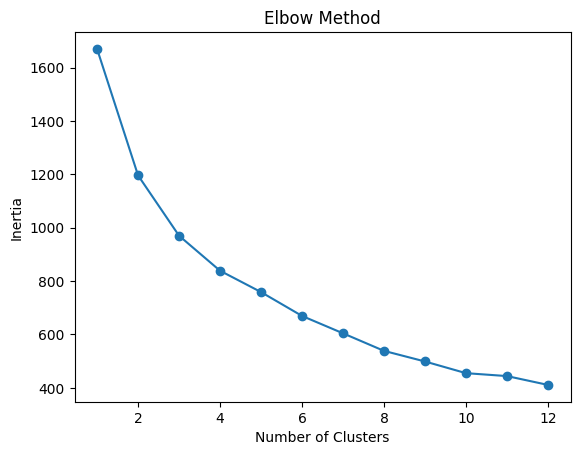

In [ ]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
X = df_kmeans[features_kmeans]
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 2 : 1196.0308625712826
Silhouette Coefficient: 0.271
Calinski-Harabasz Index: 65.387
Davies-Bouldin Index: 1.378
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 970.055623958508
Silhouette Coefficient: 0.259
Calinski-Harabasz Index: 59.167
Davies-Bouldin Index: 1.353
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 838.8528967602238
Silhouette Coefficient: 0.273
Calinski-Harabasz Index: 53.834
Davies-Bouldin Index: 1.129
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 758.8703546384223
Silhouette Coefficient: 0.216
Calinski-Harabasz Index: 48.626
Davies-Bouldin Index: 1.281
---------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


With in sum of squared error (WCSS) at K = 6 : 669.4756380647817
Silhouette Coefficient: 0.237
Calinski-Harabasz Index: 48.123
Davies-Bouldin Index: 1.068
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 7 : 604.3659757479761
Silhouette Coefficient: 0.249
Calinski-Harabasz Index: 47.019
Davies-Bouldin Index: 1.033
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 8 : 538.5982429412956
Silhouette Coefficient: 0.258
Calinski-Harabasz Index: 47.715
Davies-Bouldin Index: 1.026
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 9 : 498.79439845766547
Silhouette Coefficient: 0.247
Calinski-Harabasz Index: 46.374
Davies-Bouldin Index: 1.034
---------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

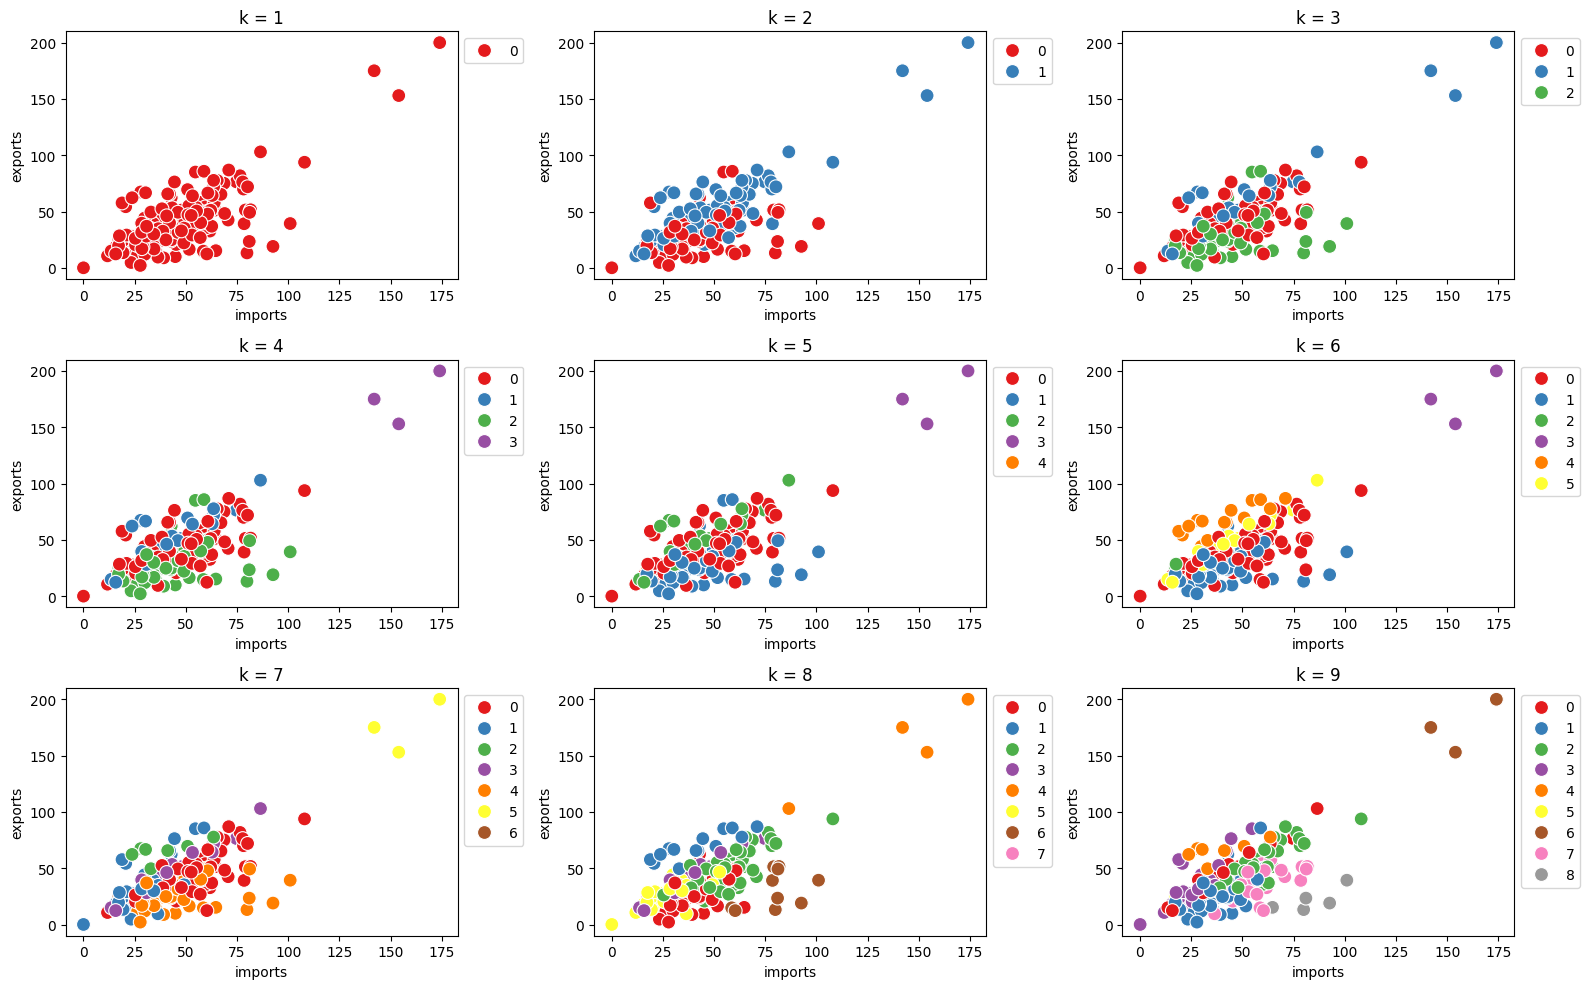

In [ ]:
# Definir o número de clusters
num_clusters = 9

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(df[features_kmeans])

# Calcular o número de linhas e colunas
rows = (num_clusters + 2) // 3  # Ajustado para garantir que todos os gráficos sejam exibidos
cols = 3

# Criar grid dos subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Aplicar flatten
axes = axes.flatten()

for k in range(1, num_clusters + 1):
    # Aplicar K-Means para o k
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot
    ax = sns.scatterplot(ax=axes[k - 1], data=df, x='imports', y='exports', hue='Cluster', palette='Set1', s=100)
    ax.set_title(f'k = {k}')

    # Ajustar posição da legenda
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Escoder subplots não usados
for ax in axes[num_clusters:]:
    ax.set_visible(False)

# Ajustar layout
plt.tight_layout()
plt.show()


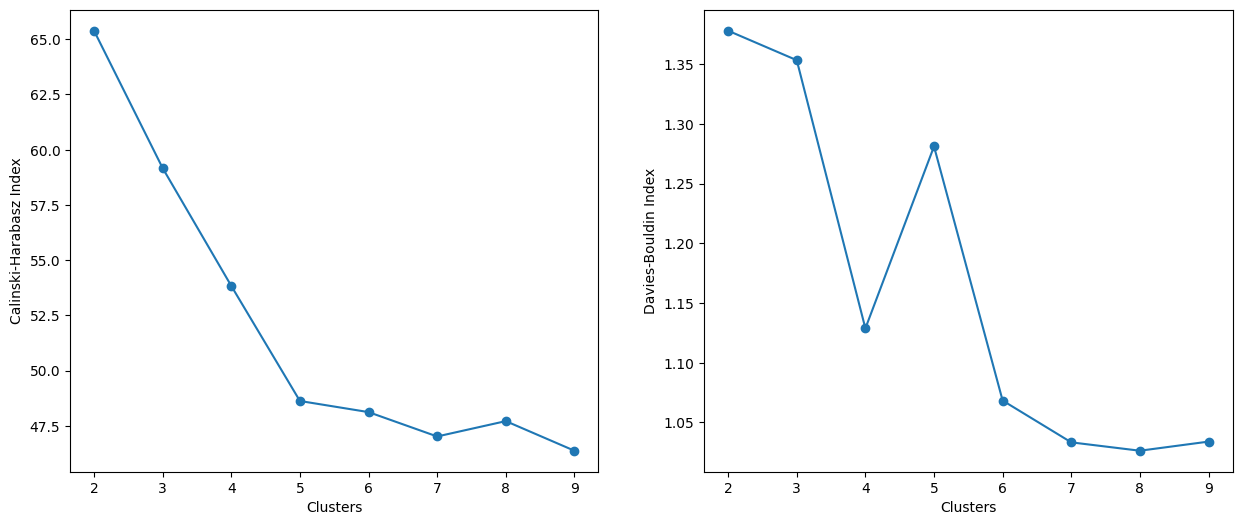

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

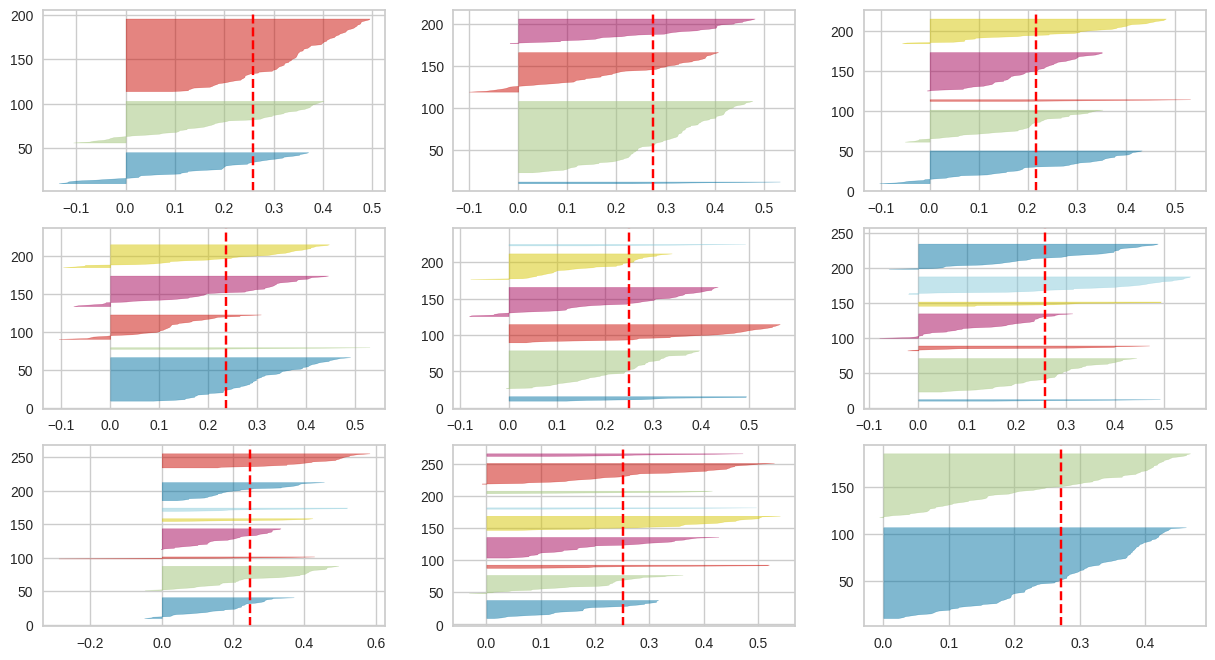

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in clusters:
  q, mod = divmod(i, 3)
  km = KMeans(n_clusters=i, random_state=0)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

A clusterização através do kmeans sem nenhuma técnica de redução de dimensionalidade não ficou boa, como é possível verificar nos testes, gráficos e índices como o da silhueta. Este indice varia de -1 a 1. Quanto mais próximo de 1 é o ideal e o mais próximo de -1, o agrupamento precisaria ser refeito.

Em geral, o coeficiente de silhueta acima de 0.5 é considerado bom, e acima de 0.7 é excelente. Nesse contexto, com base nos testes aplicados, nenhum agrupamento foi tido como bom, o melhor seria 4 clusters, com coeficiente de 0.273.

Portanto, foi necessário seguir para o procedimento PCA - técnica de Redução de dimensionalidade, que será exposto na próxima seção.

# 2.2 Cluster com PCA



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


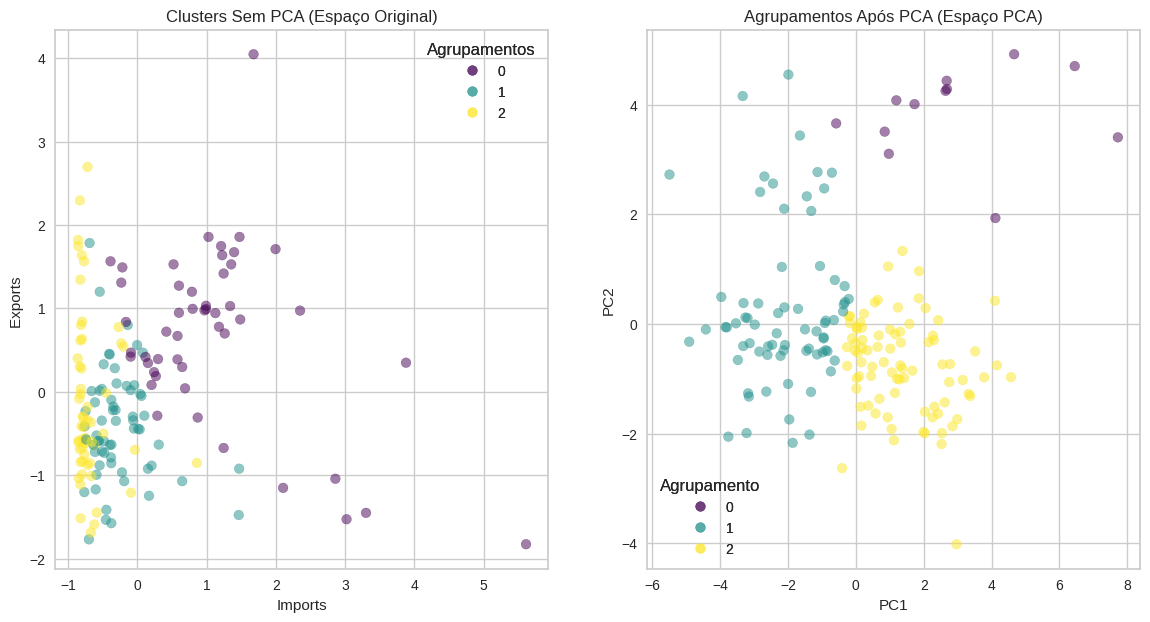

In [ ]:
df_kmeans_encoded = pd.get_dummies(df_kmeans, drop_first=True)
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df_kmeans['country'] = label_encoder.fit_transform(df_kmeans['country'])
df_kmeans['child_mort'] = label_encoder.fit_transform(df_kmeans['child_mort'])
df_kmeans['exports'] = label_encoder.fit_transform(df_kmeans['exports'])
df_kmeans['health'] = label_encoder.fit_transform(df_kmeans['health'])
df_kmeans['imports'] = label_encoder.fit_transform(df_kmeans['imports'])
df_kmeans['income'] = label_encoder.fit_transform(df_kmeans['income'])
df_kmeans[ 'inflation'] = label_encoder.fit_transform(df_kmeans[ 'inflation'])
df_kmeans['life_expec'] = label_encoder.fit_transform(df_kmeans['life_expec'])
df_kmeans['total_fer'] = label_encoder.fit_transform(df_kmeans['total_fer'])
df_kmeans['gdpp'] = label_encoder.fit_transform(df_kmeans['gdpp'])
df_kmeans['balanca_comercial'] = label_encoder.fit_transform(df_kmeans['balanca_comercial'])

# Separar características e rótulos
X = df_kmeans_encoded.drop(columns=['balanca_comercial']).values  # Todas as colunas exceto a coluna 'balança comercial'
y = df_kmeans_encoded['balanca_comercial'].values

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means diretamente nos dados padronizados (sem PCA)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans.fit_predict(X_scaled)

# Aplicar PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means após PCA
labels_pca = kmeans.fit_predict(X_pca)

# Adicionar a coluna de clusters aos dados originais
df_kmeans_encoded['Cluster'] = labels_pca

# Visualizar os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotar clusters sem PCA
scatter1 = ax1.scatter(X_scaled[:, 4], X_scaled[:, 2], c=labels_orig, cmap='viridis', alpha=0.5)
ax1.set_title('Clusters Sem PCA (Espaço Original)')
ax1.set_xlabel('Imports')
ax1.set_ylabel('Exports ')
hue = 'Cluster'
legend1 = ax1.legend(*scatter1.legend_elements(), title="Agrupamentos")
ax1.add_artist(legend1)

# Plotar clusters após PCA
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
ax2.set_title('Agrupamentos Após PCA (Espaço PCA)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Agrupamento")
ax2.add_artist(legend2)

plt.show()

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Adicionar PCA ao DataFrame
df_kmeans_encoded = df.copy()
df_kmeans_encoded['PC1'] = X_pca[:, 0]
df_kmeans_encoded['PC2'] = X_pca[:, 1]

# Adicionar a coluna de clusters aos dados originais
df_kmeans_encoded['Cluster'] = labels_pca

# Verificar se as colunas foram adicionadas corretamente
df_kmeans_encoded.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,balanca_comercial,category,Cluster,PC1,PC2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,-34.9,Maior Gasto com Saúde,1,-2.910255,0.082043
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,-20.6,Maior Gasto com Saúde,2,0.430738,-0.594100
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,7.0,Maior Gasto com Saúde,1,-0.285256,-0.443977
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,19.4,Baixo Gasto com saúde,1,-2.938550,1.737244
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,-13.4,Maior Gasto com Saúde,2,1.034761,0.133408
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2.9,Maior Gasto com Saúde,2,0.022877,-1.777522
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,-24.5,Maior Gasto com Saúde,2,-0.101314,-0.566519
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,-1.1,Maior Gasto com Saúde,2,2.344392,-1.992554
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3.5,Maior Gasto com Saúde,2,2.976618,-0.747001
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,33.6,Maior Gasto com Saúde,2,-0.181356,-0.396178


In [ ]:
# Calcular estatísticas descritivas por cluster
cluster_stats = df_kmeans_encoded.groupby('Cluster')[['PC1', 'PC2']].agg(['mean', 'median', 'std', 'count'])
cluster_stats

PC1                                 PC2                      \
             mean    median       std count      mean    median       std   
Cluster                                                                     
0        2.664473  2.441158  2.160003    12  1.977912  1.029683  2.284650   
1       -1.877661 -1.842466  1.088170    71  0.233039  0.084318  0.855992   
2        1.206432  1.031463  1.095843    84 -0.479533 -0.513724  0.985290   

               
        count  
Cluster        
0          12  
1          71  
2          84

**Conclusões Estatísticas**

Cluster 0:  parece ter uma característica mais extrema em comparação com os outros clusters, com alta variabilidade e valores altos tanto para PC1 quanto para PC2.

Cluster 1: é caracterizado por valores negativos em PC1 e valores próximos ao zero em PC2.

Cluster 2: tem uma distribuição mais centralizada com menos dispersão, mas com valores negativos para PC2 e positivos para PC1.

**Avaliação dos Clusters gerados**

In [ ]:
df_cluster_0 = df_kmeans_encoded[df_kmeans_encoded['Cluster'] == '0']
df_cluster_1 = df_kmeans_encoded[df_kmeans_encoded['Cluster'] == '1']
df_cluster_2 = df_kmeans_encoded[df_kmeans_encoded['Cluster'] == '2']



In [ ]:
# Agrupar países por cluster
clusters = df_kmeans_encoded.groupby('Cluster')['country'].apply(list).to_dict()

# Exibir países por cluster
for cluster, countries in clusters.items():
    print(f'Cluster {cluster}:')
    print(countries)

Cluster 0:
['Brunei', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Oman', 'Qatar', 'Seychelles', 'Singapore', 'Thailand', 'Turkmenistan', 'United Arab Emirates']
Cluster 1:
['Afghanistan', 'Algeria', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Uganda', 'Uzbekistan', 'Vanuatu', '

**CONCLUSÃO:**

Do ponto de vista do PCA, o agrupamento 1 representa os países mais necessitados, de modo que tal grupo de países seria o indicado a receber ajuda.

Tal afirmação advém da análise estatística dos clusters, assim como da análise dos países que estão inseridos dentro dos clusters.

Países do Grupo 1: Afghanistan', 'Algeria', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen', 'Zambia'.

Caso seja necessário uma tomada de decisão balisada em determinados indicadores econômicos e sociais, foram formulados e analisados os top 20 países para cada indicador (mortalidade infantil, exportação, importação, saúde, renda, inflação, expectativa de vida, fertilidade e PIB per capta de cada país), ordenado do país mais necessitado para o menos necessitado.

Por exemplo, caso queiram dar prioridade aos países com grande mortalidade infantil, a ordem do top 20 que necessitam de ajuda seria:  Haiti,  Lesotho, Central African Republic,  Zambia,  Malawi, South Africa, Mozambique, Sierra Leone, Guinea-Bissau, Afghanistan, Cote d'Ivoire, Chad, Uganda, Botswana, Cameroon, Congo, Dem. Rep. Burundi, Burkina Faso, Guinea e Namibia.